In [308]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import plotly.graph_objects as go
import pydmd
from sklearn.metrics import mean_absolute_error
from datetime import datetime



In [309]:
df = pd.DataFrame()
matx = pd.read_csv("DATA/nse500i.csv",header=None)
matx = pd.DataFrame(matx.transpose())
matx = matx.fillna(0)

In [310]:
mat.shape

(461, 21)

In [311]:
j=10
df = []
i=21  
# Get the last 20 columns of the DataFrame
mat = matx.iloc[:, -(i+j):-j]
day2 = matx.iloc[:, -(i+j)+1]
# Create a DMD object and fit it to the data
mat = mat.astype(float)
cp = mat.iloc[:, -1]
cp1 = mat.iloc[:, -1]
cp2 = mat.iloc[:, -2]
mat=mat.to_numpy()
dmd = pydmd.DMD(svd_rank=mat.shape[1])

dmd.fit(mat)


pred = dmd.predict(mat)
p=pred[:,-1]
mean_absolute_error(cp,np.real(p))

15.52994408934314

In [312]:
dmd.reconstructed_data.shape

(461, 21)

In [313]:
dmd.eigs.shape

(20,)

In [314]:
np.diag(np.power(dmd.eigs,1)).shape

(20, 20)

In [315]:
dmd.modes.shape

(461, 20)

In [321]:
future_state = dmd.reconstructed_data@np.diag(np.power(dmd.eigs,1))@dmd.modes.T
p2 = future_state@(p.T)

mean_absolute_error(day2,np.real(p2))

145340379.48322874

In [317]:
# # Predict the next 
dmd.dmd_time['tend'] = dmd.dmd_time['tend'] - 1
# p = np.real(dmd.predict(dmd.reconstructed_data))
# p=p[:,-1]
# mean_absolute_error(day2,np.real(p))

In [ ]:
np.linalg.matrix_rank(mat)

22

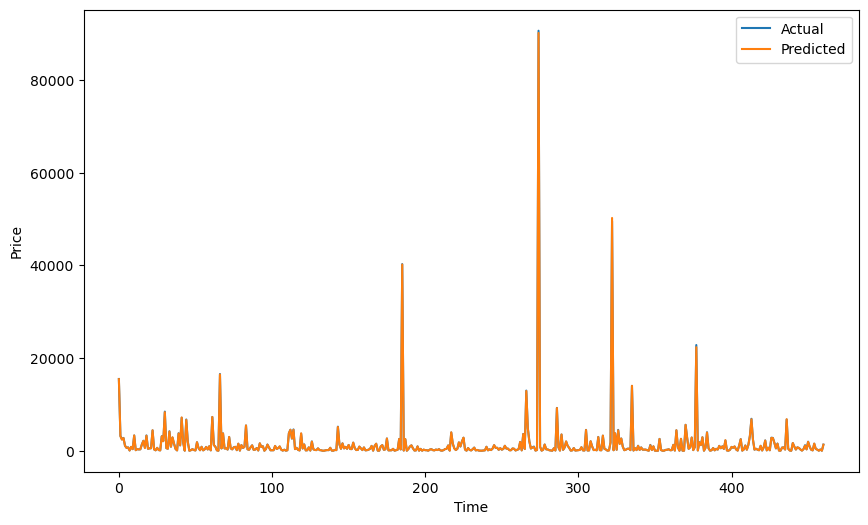

In [ ]:
# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(cp, label='Actual')
ax.plot(np.real(p), label='Predicted')
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.legend()
plt.show()


c:\Users\HAI\anaconda3\envs\normie\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


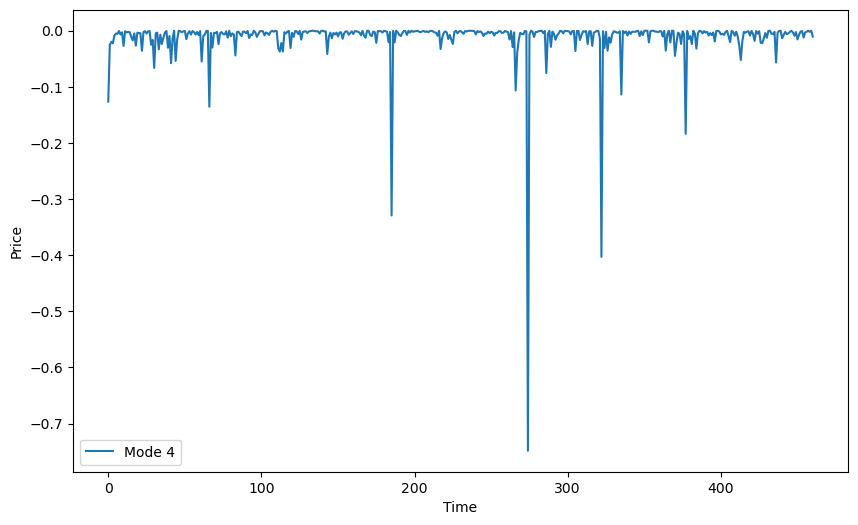

In [ ]:
#plotting the 5 dmd modes
fig, ax = plt.subplots(figsize=(10, 6))
# ax.plot(dmd.modes[:, 0], label='Mode 1')
# ax.plot(dmd.modes[:, 1], label='Mode 2')
# ax.plot(dmd.modes[:, 2], label='Mode 3')
ax.plot(dmd.modes[:, 3], label='Mode 4')
# ax.plot(dmd.modes[:, 4], label='Mode 5')
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.legend()
plt.show()


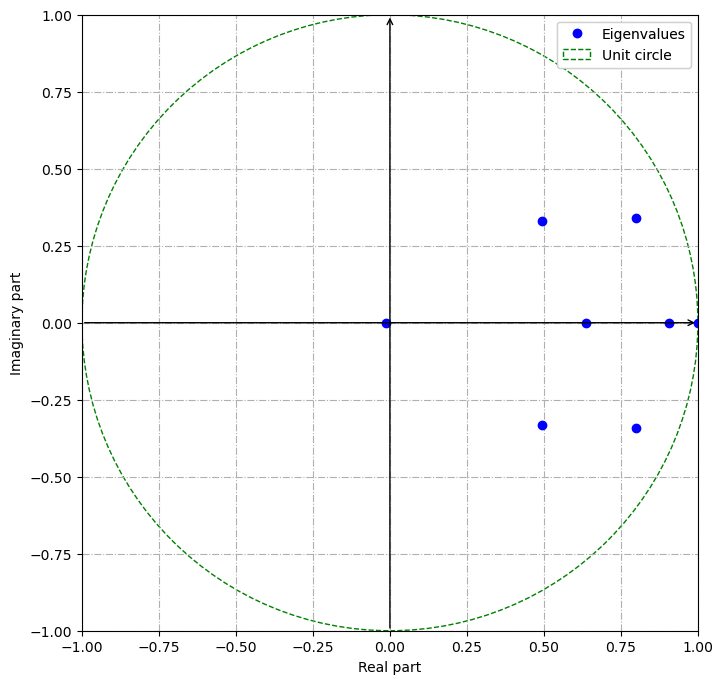

In [ ]:
dmd.plot_eigs(show_axes=True, show_unit_circle=True)


In [ ]:
m = dmd.modes
m.shape

(461, 8)

In [ ]:
dmd.growth_rate

array([-0.01239822,  0.49232209,  0.49232209,  0.99941388,  0.6377253 ,
        0.90754448,  0.79895843,  0.79895843])

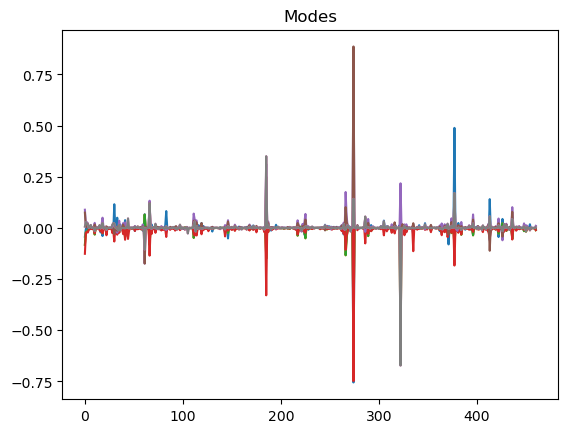

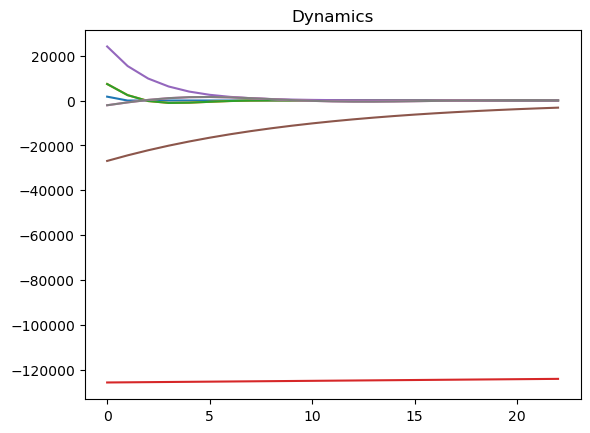

In [ ]:

for mode in dmd.modes.T:
    plt.plot(mode.real)
    plt.title('Modes')
plt.show()

for dynamic in dmd.dynamics:
    plt.plot(dynamic.real)
    plt.title('Dynamics')
plt.show()


In [ ]:
A_tilde = dmd.reconstructed_data
Phi = dmd.modes
A = dmd.eigs
Phi.shape

(461, 8)

In [ ]:
# predicting the next day 
dmd.dmd_time['tend'] = dmd.dmd_time['tend'] + 1
dmd.reconstructed_data.shape


(461, 24)

In [ ]:
pd.DataFrame(mat)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,14638.500000,14965.799800,15053.049800,15036.700200,14951.650390,14721.900390,14829.950200,14730.299800,14815.099610,14906.150390,...,15112.099610,15081.099610,15198.750000,15158.099610,15244.250000,15241.599610,15424.000000,15537.400390,15497.549800,15484.700200
1,2994.800049,3080.800049,3188.850098,3296.100098,3230.550049,3197.050049,3247.500000,3265.850098,3194.300049,3196.550049,...,3132.800049,3041.250000,3052.800049,3055.250000,3039.399902,2962.100098,3049.750000,3152.149902,3170.850098,3225.250000
2,2301.300049,2359.649902,2381.750000,2384.750000,2369.250000,2311.649902,2316.800049,2253.899902,2243.649902,2270.100098,...,2287.600098,2256.550049,2257.100098,2247.500000,2313.000000,2324.449951,2390.300049,2428.050049,2440.000000,2455.350098
3,2466.399902,2442.949951,2516.100098,2525.800049,2542.500000,2553.899902,2556.550049,2598.050049,2598.350098,2592.149902,...,2584.600098,2606.350098,2605.100098,2648.350098,2672.399902,2638.850098,2681.750000,2699.649902,2773.699951,2765.899902
4,1063.250000,1097.400024,1137.300049,1148.199951,1125.949951,1091.550049,1099.500000,1089.650024,1120.750000,1118.250000,...,1087.000000,1077.750000,1099.650024,1077.349976,1071.050049,1078.050049,1078.949951,1084.349976,1088.800049,1091.849976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,240.250000,245.899994,247.500000,253.550003,243.100006,246.899994,243.649994,241.100006,243.649994,244.000000,...,243.750000,241.750000,240.050003,238.300003,239.550003,236.600006,233.449997,236.699997,240.449997,241.449997
457,15.400000,16.200001,16.500000,16.549999,16.450001,16.150000,16.000000,15.800000,15.800000,15.750000,...,15.950000,16.049999,15.750000,15.600000,15.750000,15.650000,15.550000,15.500000,15.500000,16.100000
458,252.199997,268.200012,279.950012,281.799988,278.600006,272.649994,267.950012,273.149994,267.399994,263.700012,...,271.000000,266.950012,267.450012,262.950012,265.899994,263.049988,262.450012,262.500000,264.950012,267.399994
459,7.050000,7.300000,7.200000,7.450000,7.400000,7.300000,7.200000,7.100000,7.200000,7.100000,...,7.150000,7.150000,7.200000,7.200000,7.150000,7.150000,7.150000,7.150000,7.150000,7.050000


In [ ]:
pd.DataFrame(np.real(dmd.reconstructed_data))

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,14653.876309,14967.728592,15055.299255,15021.101777,14949.649234,14900.465378,14893.163348,14921.073669,14968.245936,15020.440096,...,15214.713162,15246.442771,15278.113304,15309.323970,15339.281582,15367.091922,15391.980633,15413.426662,15431.214107,15445.419176
1,2988.247132,3120.256341,3190.944310,3223.474243,3237.689075,3243.854037,3243.682267,3235.599121,3218.816489,3194.881310,...,3093.294885,3091.993992,3096.179643,3103.776561,3112.659482,3121.007607,3127.519755,3131.491946,3132.780851,3131.688162
2,2305.119314,2359.554613,2381.984022,2370.175479,2343.648688,2316.956226,2296.321631,2282.549975,2274.504438,2271.118005,...,2312.355227,2328.012908,2343.533659,2357.824875,2370.114983,2380.012183,2387.485659,2392.791487,2396.369803,2398.737506
3,2455.116850,2485.250926,2516.389356,2546.457577,2567.790776,2581.667055,2590.545992,2596.165708,2599.731105,2602.389139,...,2638.058867,2651.681826,2666.087919,2680.277924,2693.378769,2704.762452,2714.097305,2721.338792,2726.676078,2730.453984
4,1067.267653,1108.457355,1120.966651,1121.470344,1118.362759,1115.776067,1114.478768,1113.658913,1112.288626,1109.786180,...,1089.049867,1086.217086,1084.240401,1082.998225,1082.292149,1081.898409,1081.609363,1081.261393,1080.748719,1080.024758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,240.258603,246.573916,248.094046,247.644227,246.426317,245.322135,244.642504,244.304792,244.079228,243.761020,...,239.858744,239.082567,238.447925,237.963558,237.615111,237.373177,237.201593,237.064616,236.932188,236.782998
457,15.458357,16.175063,16.436105,16.412910,16.267548,16.111657,15.997878,15.935929,15.913016,15.909487,...,15.768845,15.703706,15.635443,15.568973,15.508120,15.455289,15.411421,15.376188,15.348323,15.326020
458,253.720049,270.352867,277.203062,277.617790,275.416170,272.957288,271.219162,270.303401,269.928282,269.749708,...,266.571710,265.539489,264.528099,263.591660,262.764582,262.061445,261.479596,261.003492,260.609840,260.272663
459,7.040867,7.271650,7.363794,7.361471,7.314463,7.260888,7.220140,7.196951,7.188052,7.187529,...,7.175381,7.163968,7.151062,7.137751,7.124955,7.113334,7.103253,7.094794,7.087811,7.082003
